<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/06-Support-Vector-Machine-(SVM)/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Support Vector Machine

In [1]:
# Miguel Ángel Hernández Tapia

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ipywidgets import interact
from sklearn.datasets import make_blobs

In [2]:
# Support Vector Machine (SVM) Algorithm

def mySVC( myKernel='linear', myC=.01):

    X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.9, random_state=40)
    y = np.where(y == 0, -1, 1)  # Convert the labels to {+1, -1}
    # X = np.array([[-1,1],[-3,-1],[-6,2],[4,-2]])
    # y = np.array([1, 1, 1, -1])

    # Create and train the Support Vector Classifier (SVM) with a specified kernel and penalty parameter C
    clf = SVC(kernel=myKernel, C=myC)
    clf.fit(X, y)  # Train the SVM

    # Display the number of support vectors and their multipliers
    print("Number of Support Vectors:\t" + str(len(clf.support_vectors_)))
    print("Multipliers:\t" + str(np.abs(clf.dual_coef_)))  # svm.dual_coef_[i] = labels[i] * alphas[i]

    # Plot the data points, coloring them according to their class
    plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors='black', cmap='Set3')

    # Highlight the support vectors with a specific marker
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], lw=2, s=200, edgecolors='k', facecolors='None')

    # Create a grid to evaluate the model and plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid of values between the x and y limits
    x = np.linspace(xlim[0], xlim[1], 3)
    z = np.linspace(ylim[0], ylim[1], 3)
    Y, X = np.meshgrid(z, x)
    xz = np.vstack([X.ravel(), Y.ravel()]).T

    # Compute the decision function values for the grid points
    P = clf.decision_function(xz).reshape(X.shape)

    # Plot the decision boundaries
    ax.contour(X, Y, P, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()

In [3]:

# Interactive Plot
interact(mySVC, myKernel=['linear', 'rbf', 'poly'], myC=(0.01,4,0.01), addPoint=[0,0])
plt.show()

interactive(children=(Dropdown(description='myKernel', options=('linear', 'rbf', 'poly'), value='linear'), Flo…

# Manual Implementation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [38]:
# Create a synthetic dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.8, random_state=40)
y = np.where(y == 0, -1, 1)  # Convert the labels to {+1, -1}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

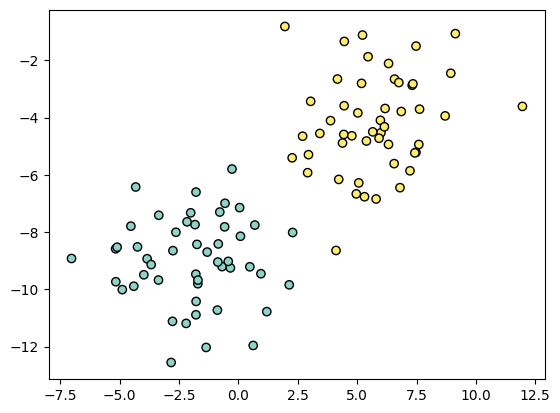

In [39]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Set3', edgecolors='k')
plt.show()

In [40]:
# Implementing a Support Vector Machine (SVM) classifier
class SVM:

    # Initialization of the SVM class
    def __init__(self, learning_rate=0.001, lambda_param=0.01, iterations=1000):

        self.lr = learning_rate             # Learning rate for model training
        self.lambda_param = lambda_param    # Regularization parameter to control overfitting
        self.iterations = iterations        # Number of iterations for training the model
        self.w = None                       # Weights initialized to None
        self.b = None                       # Bias term initialized to None

    # Fit method to train the SVM model
    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)        # Converting labels to -1 and 1
        n_samples, n_features = X.shape     # Getting the number of samples and features

        self.w = np.zeros(n_features)  # Initializing weights to zeros
        self.b = 0                    # Initializing bias term to zero

        # Iterating through the specified number of iterations
        for _ in range(self.iterations):

            # Iterating through each sample in the dataset
            for idx, x_i in enumerate(X):

                # Checking the condition if the sample is classified correctly or not
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1

                # If sample is classified correctly, just update the weight with the regularization term
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)

                # If sample is not classified correctly, update the weight and bias with the gradients
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    # Predict method to make predictions on new data
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b    # Calculating the linear output
        return np.sign(linear_output)                 # Returning the sign of linear output as the predicted class label


In [41]:
# Training the SVM
svm = SVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# Printing the metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, pos_label=-1))
print("Recall:", recall_score(y_test, predictions, pos_label=-1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


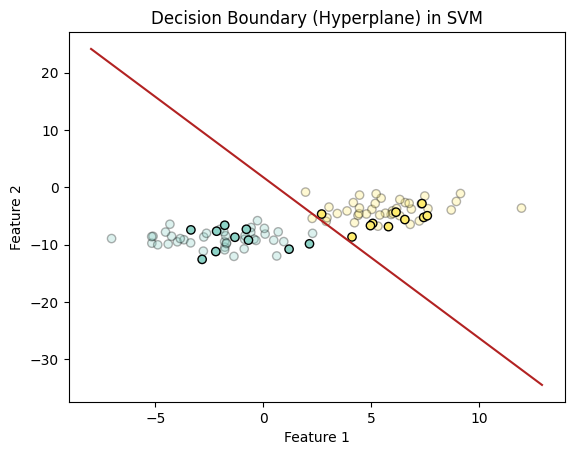

Equation of the Hyperplane: 0.71x1 + 0.25x2 + -0.44 = 0


In [43]:

# Plotting the dataset (Train and Test data)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='Set3', edgecolors='k', alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='Set3', edgecolors='k')

# Draw Hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
xx = np.linspace(xlim[0], xlim[1])
yy = - (svm.w[0] * xx + svm.b) / svm.w[1]
plt.plot(xx, yy, '-', color="firebrick")

# Setting properties of the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Hyperplane) in SVM")
plt.show()

# Print the equation of the line
print("Equation of the Hyperplane: {:.2f}x1 + {:.2f}x2 + {:.2f} = 0".format(svm.w[0], svm.w[1], svm.b))

